In [1]:
%run ../../utils/commonImports.py
%run ../../utils/tradingImports.py
%matplotlib inline

from base import supres

# Load Data

In [2]:
# dropbox_dir = 'D:\\Dropbox\\My work\\krypl-project'
dropbox_dir = '/Users/david.vesely/Dropbox/My work/krypl-project'

In [3]:
rpath = os.path.join(dropbox_dir,'result', 'base-strategy-learn.tsv')
results = read_tsv(rpath)

In [4]:
results.shape

(312000, 7)

In [5]:
results.head()

,pair,window_size,target,stop_loss,_return,target_hits,target_hits_rel
0,BTC_BAT,4,0.0100,-0.0100,-0.0500,10.0000,0.5000
1,BTC_BAT,4,0.0100,-0.0100,-0.0400,21.0000,0.6562
2,BTC_BAT,4,0.0100,-0.0100,-0.0600,6.0000,0.5000
3,BTC_BAT,4,0.0100,-0.0100,-0.1000,1.0000,1.0000
4,BTC_BAT,4,0.0100,-0.0100,-0.0200,68.0000,0.6733


# Find best params

In [21]:
cols = ['window_size', 'target', 'stop_loss', '_return']
aggregated = results.groupby(cols).agg({'target_hits': 'sum', 'target_hits_rel': 'mean'}).reset_index()

In [22]:
aggregated.query('target_hits > 500')\
    .sort_values('target_hits_rel', ascending=False)\
    .head(10)

,window_size,target,stop_loss,_return,target_hits,target_hits_rel
7806,30,0.0100,-0.1000,-0.0400,"1,926.0000",0.9916
7807,30,0.0100,-0.1000,-0.0300,"2,176.0000",0.9916
7808,30,0.0100,-0.1000,-0.0200,"2,450.0000",0.9915
7809,30,0.0100,-0.1000,-0.0100,"2,758.0000",0.9912
5200,12,0.0100,-0.1000,-0.1000,"1,440.0000",0.9912
6509,24,0.0100,-0.1000,-0.0100,"3,818.0000",0.9911
7805,30,0.0100,-0.1000,-0.0500,"1,719.0000",0.9910
7802,30,0.0100,-0.1000,-0.0800,"1,227.0000",0.9908
5201,12,0.0100,-0.1000,-0.0900,"1,732.0000",0.9907
6508,24,0.0100,-0.1000,-0.0200,"3,229.0000",0.9906


# See dependencies on target

In [10]:
def plot_selected(selected, window_size, stop_loss, _return):
    plt.figure(figsize=[10, 6])

    ax = sns.lineplot(selected['target'], selected['target_hits'], color='b', label='target_hits')
    ax2 = plt.twinx(ax)
    sns.lineplot(selected['target'], selected['target_hits_rel'], ax=ax2, color='r', label='target_hits_rel');

    plt.title(f'Target dependency - w {window_size} - _r {_return} - sl {stop_loss}', fontproperties=title_font)
    ax.legend(loc='upper left')
    ax.set_ylabel('target_hits', fontproperties=axis_font)
    ax2.set_ylabel('target_hits_rel', fontproperties=axis_font)
    ax.set_xlabel('target', fontproperties=axis_font);

In [13]:
window_size = 24
stop_loss = -.05

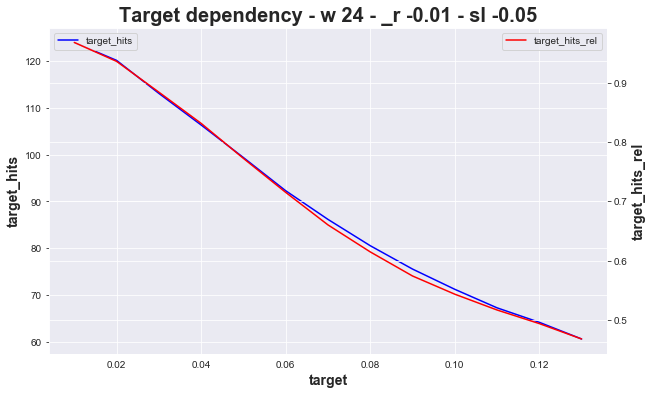

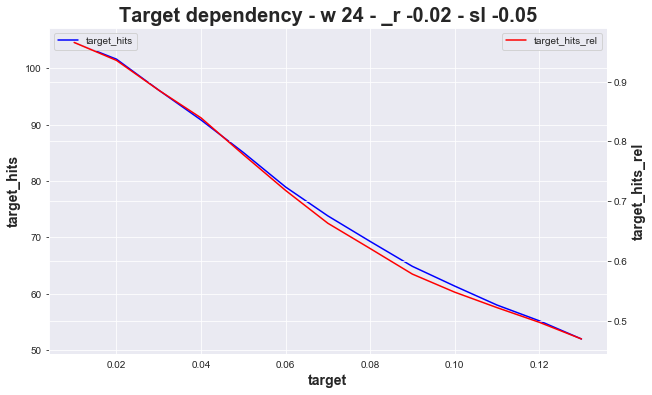

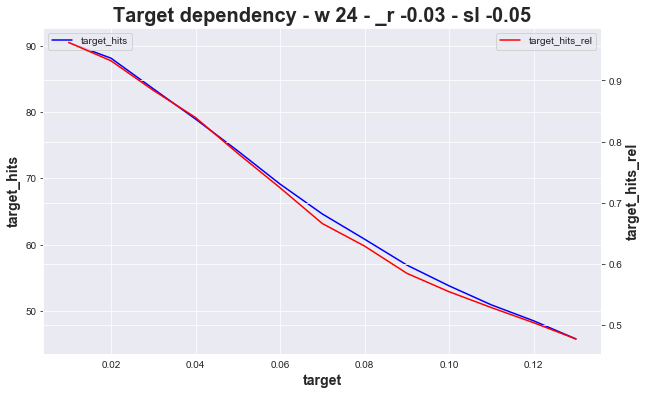

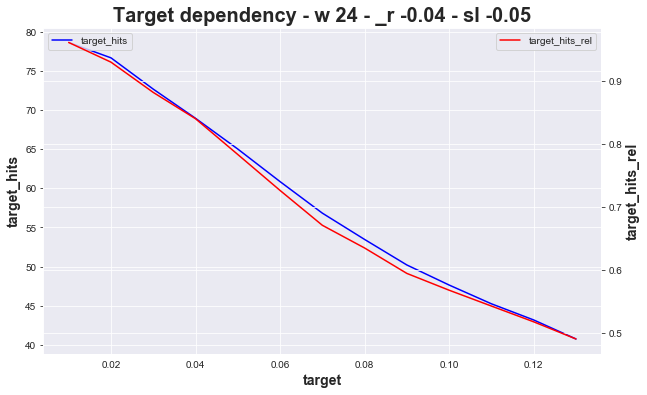

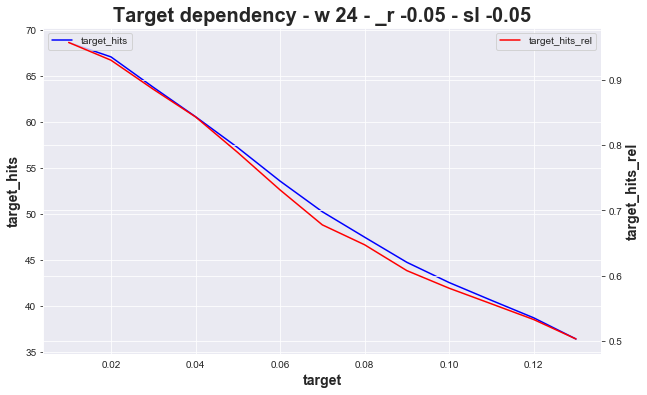

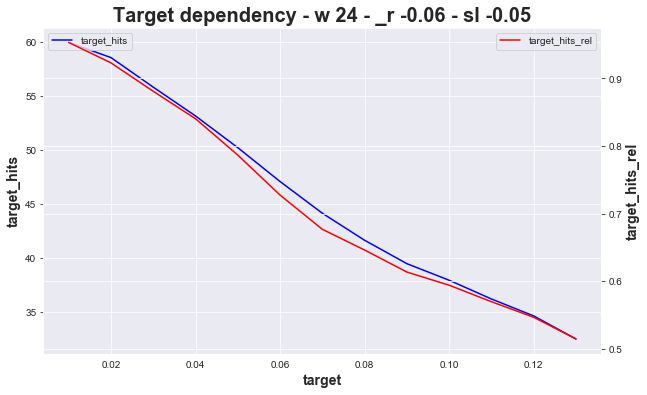

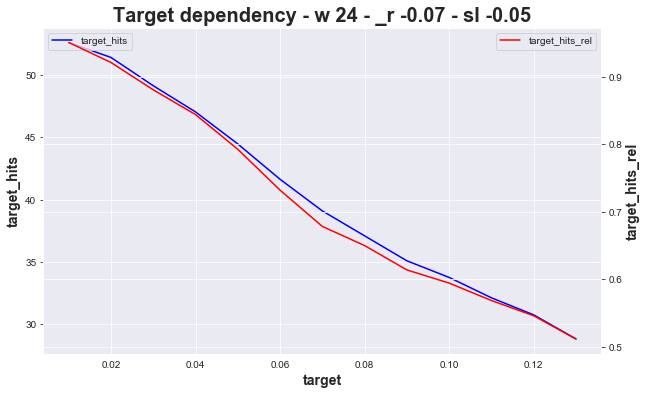

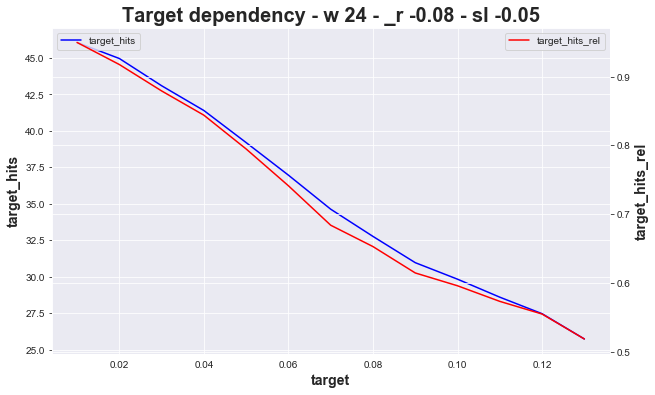

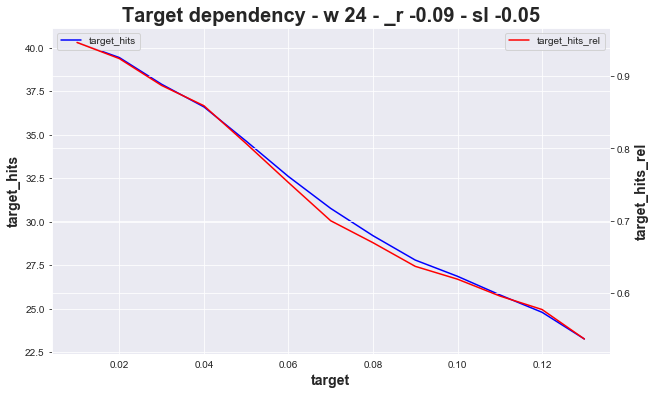

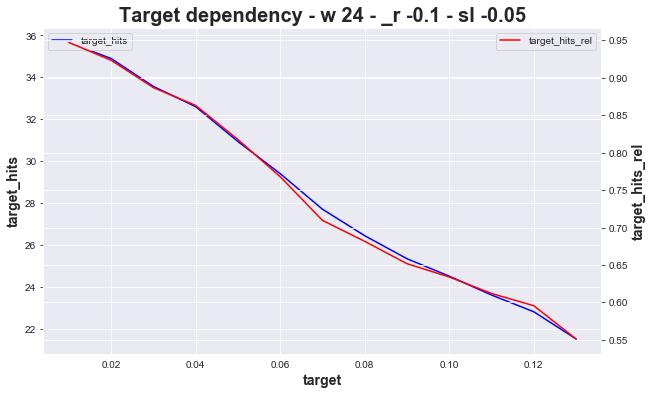

In [14]:
returns = results['_return'].drop_duplicates().sort_values(ascending=False).tolist()
for _return in returns:
    selected = aggregated.query(f'window_size == {window_size}')\
        .query(f'_return == {_return}')\
        .query(f'stop_loss == {stop_loss}')\
        .reset_index()
    plot_selected(selected, window_size, stop_loss, _return)

# Tmp

In [28]:
aggregated.query('target == -_return and target >= 0.04 and stop_loss == -0.04')\
    .sort_values('target_hits_rel', ascending=False)

,window_size,target,stop_loss,_return,target_hits,target_hits_rel
9466,48,0.0400,-0.0400,-0.0400,856.0000,0.8246
6866,24,0.0400,-0.0400,-0.0400,"1,975.0000",0.8020
9565,48,0.0500,-0.0400,-0.0500,747.0000,0.7905
8166,30,0.0400,-0.0400,-0.0400,"1,563.0000",0.7887
5566,12,0.0400,-0.0400,-0.0400,"3,714.0000",0.7556
8265,30,0.0500,-0.0400,-0.0500,"1,327.0000",0.7524
9664,48,0.0600,-0.0400,-0.0600,658.0000,0.7455
6965,24,0.0500,-0.0400,-0.0500,"1,618.0000",0.7420
4266,10,0.0400,-0.0400,-0.0400,"4,094.0000",0.7382
2966,8,0.0400,-0.0400,-0.0400,"4,653.0000",0.7223
